<a href="https://colab.research.google.com/github/Intertangler/ML4biotech/blob/main/cb206v_exercise6_deepneuralnetworks_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import the data
This artificial data represents the gene expression levels (normalized already) of two separate genes. The class labels associated with each data point indicate the presence or absence 1 or 0 of a particular downstream phenotype influenced by the genes. Our goal here is to detect a nonlinear relationship between the two gene expression levels that strongly correlates with the downstream phenotype.

In [1]:
library(readr)
url <- "https://raw.githubusercontent.com/Intertangler/ML4biotech/main/gene_expression_XOR.csv"
df <- read_csv(url)
X <- df[, -ncol(df)]
y <- df[, ncol(df)]


Rows: 1000 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Gene_Expression_1, Gene_Expression_2, Label

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
install.packages("caret")
install.packages("caTools")
install.packages("pROC")
library(readr)
library(dplyr)
# Load required packages
library(caTools)
library(pROC)
# Plotting
# This part would go into a separate block if you are running in R Studio or similar
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 1000 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Gene_Expression_1, Gene_Expression_2, Label

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


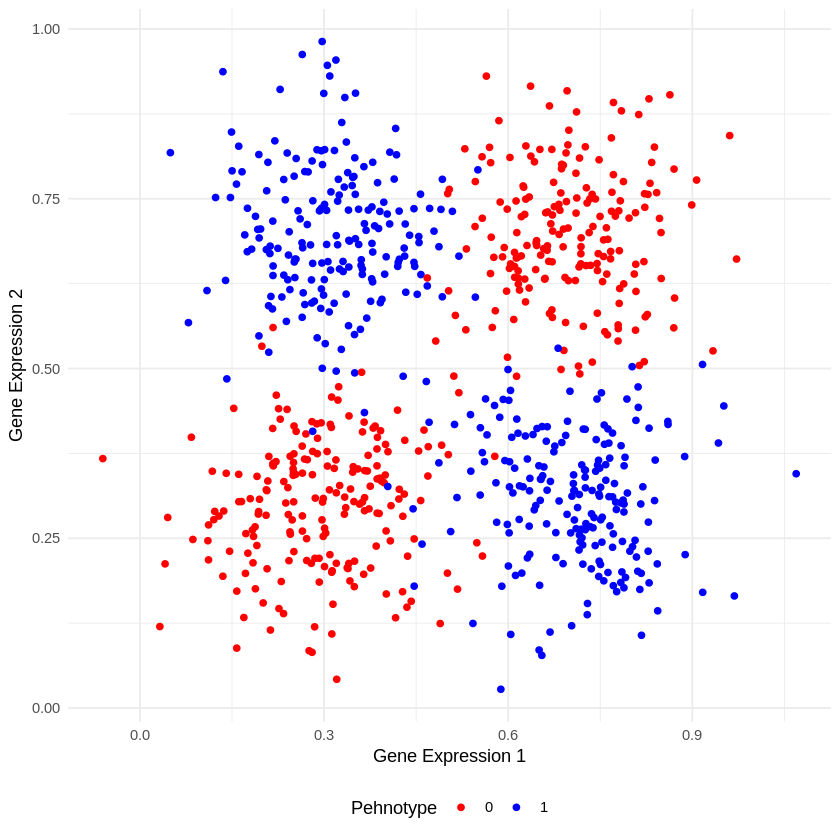

In [11]:
url <- "https://raw.githubusercontent.com/Intertangler/ML4biotech/main/gene_expression_XOR.csv"
df <- read_csv(url)

X <- df %>% select(-last_col())
y <- df %>% select(last_col())

# Convert data frames to matrices or vectors as needed
X <- as.matrix(X)
y <- as.vector(y[[1]])

# shuffle data and labels
shuffle_idx <- sample(seq_len(nrow(X)), replace = FALSE)
X <- X[shuffle_idx, , drop = FALSE]
y <- y[shuffle_idx]

set.seed(428) # Seed random number gen

# Split data to training/testing subsets
split <- sample.split(y, SplitRatio = 0.8)
X_train <- X[split, ]
y_train <- y[split]
X_test <- X[!split, ]
y_test <- y[!split]

# Prepare the data frame for ggplot
data_plot <- data.frame(X1 = X_train[, 1], X2 = X_train[, 2], Class = as.factor(y_train))

# Plot data points using ggplot
ggplot(data = data_plot, aes(x = X1, y = X2, color = Class)) +
  geom_point() +
  xlab("Gene Expression 1") +
  ylab("Gene Expression 2") +
  scale_color_manual(name = "Pehnotype", values = c("0" = "red", "1" = "blue")) +
  theme_minimal() +
  theme(legend.position = "bottom")

## exercise
Complete the missing lines.
Use the Keras library to construct a deep neural network - define the model type, its architecture by deciding the number of layers and nodes, the activation function. Compile the model with appropriate loss function, and learning rate scheduling mechanism.

The code after this section will then fit the model to the training input and output data. And then a test data set that has been set aside will be used to score the performance with an ROC curve. Compare the performance of your model to a logistic regression. If things have been set up right, the neural network should outperform the logistic regression.


# weights:  81
initial  value 313.389503 
iter  10 value 180.973456
iter  20 value 56.621398
iter  30 value 36.447694
iter  40 value 34.336091
iter  50 value 33.273514
iter  60 value 31.135312
iter  70 value 30.793810
iter  80 value 30.009857
iter  90 value 29.094119
iter 100 value 28.558294
iter 110 value 27.513095
iter 120 value 27.351997
iter 130 value 27.177762
iter 140 value 27.085947
iter 150 value 26.883982
iter 160 value 26.798833
iter 170 value 25.783617
iter 180 value 25.597992
iter 190 value 25.498308
iter 200 value 25.187380
iter 210 value 24.635870
iter 220 value 24.396255
iter 230 value 24.300382
iter 240 value 24.249001
iter 250 value 24.182351
iter 260 value 24.027080
iter 270 value 23.817558
iter 280 value 23.354437
iter 290 value 22.954729
iter 300 value 22.701323
final  value 22.701323 
stopped after 300 iterations


Setting levels: control = 0, case = 1

Warning message in roc.default(y_test, mlp_prob):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



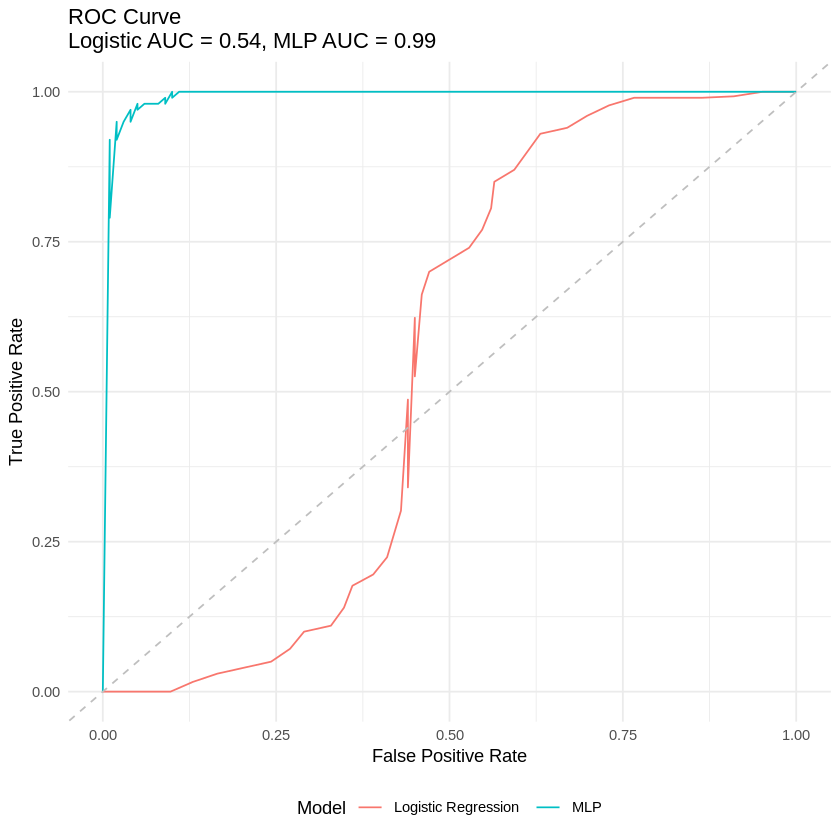

In [13]:
# load required packages
library(nnet)
library(pROC)
library(caTools)
library(ggplot2)
library(dplyr)

# set seed for reproducibility
set.seed(428)


#🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#  # define the neural network model with 20 hidden units and a sigmoid output




# make probability predictions on the test set
mlp_prob <- predict(mlp_model, X_test, type = "raw")

# generate ROC data for MLP
roc_data_mlp <- roc(y_test, mlp_prob)
mlp_fpr <- 1 - roc_data_mlp$specificities
mlp_tpr <- roc_data_mlp$sensitivities
mlp_auc <- auc(roc_data_mlp)

# train a logistic regression model for comparison
logreg_model <- glm(y_train ~ ., data = data.frame(y_train, X_train), family = binomial)

# make probability predictions on the test set using logistic regression
logreg_prob <- predict(logreg_model, newdata = data.frame(X_test), type = "response")

# generate ROC data for logistic regression
roc_data_logreg <- roc(y_test, logreg_prob)
logreg_fpr <- 1 - roc_data_logreg$specificities
logreg_tpr <- roc_data_logreg$sensitivities
logreg_auc <- auc(roc_data_logreg)

# minimum number of points between the two ROC curves
min_length <- min(length(logreg_fpr), length(mlp_fpr))

# Interpolate both ROC curves to have the same number of points
logreg_fpr_interp <- approx(x = seq_along(logreg_fpr), y = logreg_fpr, n = min_length)$y
logreg_tpr_interp <- approx(x = seq_along(logreg_tpr), y = logreg_tpr, n = min_length)$y
mlp_fpr_interp <- approx(x = seq_along(mlp_fpr), y = mlp_fpr, n = min_length)$y
mlp_tpr_interp <- approx(x = seq_along(mlp_tpr), y = mlp_tpr, n = min_length)$y

# data frame for ggplot with interpolated values
roc_df <- data.frame(
  FPR = c(logreg_fpr_interp, mlp_fpr_interp),
  TPR = c(logreg_tpr_interp, mlp_tpr_interp),
  Model = factor(rep(c("Logistic Regression", "MLP"), each = min_length))
)

# ROC plot
ggplot(roc_df, aes(x = FPR, y = TPR, color = Model)) +
  geom_line() +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "grey") +
  xlab("False Positive Rate") +
  ylab("True Positive Rate") +
  ggtitle(sprintf("ROC Curve\nLogistic AUC = %0.2f, MLP AUC = %0.2f", logreg_auc, mlp_auc)) +
  theme_minimal() +
  theme(legend.position = "bottom")

